#📌 Extracción

In [29]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Nombre del archivo JSON
nombre_archivo_json = 'TelecomX_Data.json'

# Extraer los datos del archivo JSON
try:
    with open(nombre_archivo_json, 'r', encoding='utf-8') as f:
        datos_json = json.load(f)
    print("Datos extraídos del JSON exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo '{nombre_archivo_json}' no fue encontrado.")
    datos_json = None
except json.JSONDecodeError:
    print(f"Error: El archivo '{nombre_archivo_json}' no contiene un JSON válido.")
    datos_json = None
except Exception as e:
    print(f"Ocurrió un error inesperado al leer el archivo JSON: {e}")
    datos_json = None

# Convertir los datos a un DataFrame de pandas
if datos_json:
    try:
        df = pd.DataFrame(datos_json)
        print("\nDataFrame creado exitosamente:")
        print(df.head())
    except Exception as e:
        print(f"Ocurrió un error al convertir los datos a DataFrame: {e}")
else:
    print("\nNo se pudieron cargar los datos para crear el DataFrame.")

Datos extraídos del JSON exitosamente.

DataFrame creado exitosamente:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity':

#🔧 Transformación

In [18]:
# ✅ Explorar las columnas del dataset y verificar sus tipos de datos.
if df is not None:
    print("\n--- Información General del DataFrame ---")
    df.info()

    print("\n--- Primeras 5 filas del DataFrame ---")
    print(df.head())

    print("\n--- Nombres de las Columnas ---")
    print(df.columns)

    print("\n--- Tipos de Datos de cada Columna ---")
    print(df.dtypes)

    print("\n--- Estadísticas Descriptivas (para todas las columnas) ---")
    print(df.describe(include='all'))

    # Contar valores únicos por columna (útil para categóricas)
    print("\n--- Conteo de Valores Únicos por Columna (primeras 10) ---")
    for col in df.columns[:10]: # Mostramos solo las primeras 10 para no saturar
        print(f"\nColumna: {col}")
        print(df[col].value_counts(dropna=False)) # dropna=False para incluir NaNs en el conteo
else:
    print("\nEl DataFrame 'df' no está cargado. Ejecuta el paso de extracción primero.")


--- Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

--- Primeras 5 filas del DataFrame ---
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

    

In [19]:
if df is not None:
    print("\n--- 1. Aplanando el DataFrame (Desanidando columnas) ---")
    # Columnas anidadas identificadas: 'customer', 'phone', 'internet', 'account'

    # Normalizar (aplanar) cada columna anidada
    df_customer = pd.json_normalize(df['customer'])
    df_phone = pd.json_normalize(df['phone'])
    df_internet = pd.json_normalize(df['internet'])
    df_account = pd.json_normalize(df['account'])

    # Concatenar los DataFrames normalizados con las columnas no anidadas del df original
    df_aplanado = pd.concat([
        df[['customerID', 'Churn']],
        # Columnas no anidadas
        df_customer,
        df_phone,
        df_internet,
        df_account
    ], axis=1)

    print("DataFrame aplanado:")
    print(df_aplanado.head())
    print("\n--- Información del DataFrame Aplanado ---")
    df_aplanado.info()

    print("\n--- 2. Verificación de Valores Ausentes (NaN) ---")
    print(df_aplanado.isnull().sum())
    # Observar si hay valores ausentes y en qué columnas.
    # 'TotalCharges' a menudo tiene ausentes que en realidad son clientes nuevos con 0 cargos.

    print("\n--- 3. Verificación de Filas Duplicadas ---")
    duplicados = df_aplanado.duplicated().sum()
    print(f"Número de filas duplicadas: {duplicados}")
    if duplicados > 0:
        #df_aplanado = df_aplanado.drop_duplicates() # Opción para eliminarlos
        print("Se encontraron filas duplicadas. Considera eliminarlas si es apropiado.")

    print("\n--- 4. Revisión de Tipos de Datos y Errores de Formato ---")
    print("Tipos de datos actuales:")
    print(df_aplanado.dtypes)

    # Columna 'TotalCharges': A menudo es de tipo 'object' por espacios vacíos.
    # Si un cliente es nuevo (tenure=0), TotalCharges puede ser un espacio " ".
    print("\nRevisando 'TotalCharges':")
    if 'TotalCharges' in df_aplanado.columns:
        print(f"Valores únicos en 'TotalCharges' (antes de convertir): {df_aplanado['TotalCharges'].unique()[:10]}") # Muestra algunos
        # Intentar convertir a numérico. Los espacios vacíos se convertirán a NaN.
        df_aplanado['TotalCharges'] = pd.to_numeric(df_aplanado['TotalCharges'], errors='coerce')
        print(f"Valores ausentes en 'TotalCharges' DESPUÉS de convertir a numérico: {df_aplanado['TotalCharges'].isnull().sum()}")

        # Manejar los NaN en TotalCharges (ej. imputar con 0 para clientes con tenure=0 o la media/mediana)
        # Una estrategia común es reemplazar NaN con 0 si tenure es 0, o imputar de otra forma.
        # Por ahora, solo lo identificamos. La imputación se haría en un paso posterior de limpieza.
        # Ejemplo de imputación con 0 para tenure=0:
        # df_aplanado.loc[df_aplanado['tenure'] == 0, 'TotalCharges'] = 0
        # O rellenar todos los NaN restantes con 0 (si es apropiado para el contexto):
        df_aplanado['TotalCharges'].fillna(0, inplace=True)
        print(f"Valores ausentes en 'TotalCharges' DESPUÉS de fillna(0): {df_aplanado['TotalCharges'].isnull().sum()}")
    else:
        print("'TotalCharges' no encontrada en el DataFrame aplanado.")

    print("\n--- 5. Inconsistencias en Categorías ---")
    # Revisar la columna objetivo 'Churn'
    if 'Churn' in df_aplanado.columns:
        print("\nValores en la columna 'Churn':")
        print(df_aplanado['Churn'].value_counts(dropna=False))
        # Convertir 'Churn' a formato numérico (0/1)
        df_aplanado['Churn'] = df_aplanado['Churn'].replace({'No': 0, 'Yes': 1})
        print("\nValores en 'Churn' después de convertir a numérico:")
        print(df_aplanado['Churn'].value_counts(dropna=False))

    # Revisar otras columnas categóricas importantes (ejemplos)
    columnas_categoricas_revisar = ['gender', 'Contract', 'PaymentMethod', 'InternetService']
    for col in columnas_categoricas_revisar:
        if col in df_aplanado.columns:
            print(f"\nValores en la columna '{col}':")
            print(df_aplanado[col].value_counts(dropna=False))
    # Aquí podrías buscar valores como "No internet service" y "No" que podrían unificarse,
    # o variaciones en mayúsculas/minúsculas.

    print("\n--- Resumen Final del DataFrame Aplanado y Verificado (primeras filas) ---")
    print(df_aplanado.head())
    print("\n--- Información Final del DataFrame Aplanado ---")
    df_aplanado.info()

else:
    print("\nEl DataFrame 'df' no está cargado. Ejecuta el paso de extracción primero.")


--- 1. Aplanando el DataFrame (Desanidando columnas) ---
DataFrame aplanado:
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0       

# Manejo inconsistencias

In [20]:
# --- Corrección de inconsistencias y limpieza de datos ---

# 1. Rellenar valores faltantes en columnas categóricas con 'No' o 'Desconocido' según corresponda
cat_cols = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'gender'
]
for col in cat_cols:
    if col in df_aplanado.columns:
        df_aplanado[col].fillna('Desconocido', inplace=True)

# 2. Unificar categorías similares
# Ejemplo: "No internet service" y "No" en servicios de internet
internet_related = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
for col in internet_related:
    if col in df_aplanado.columns:
        df_aplanado[col] = df_aplanado[col].replace({'No internet service': 'No'})

if 'MultipleLines' in df_aplanado.columns:
    df_aplanado['MultipleLines'] = df_aplanado['MultipleLines'].replace({'No phone service': 'No'})

# 3. Corregir tipos de datos
# 'Charges.Total' puede estar como object, convertir a numérico
if 'Charges.Total' in df_aplanado.columns:
    df_aplanado['Charges.Total'] = pd.to_numeric(df_aplanado['Charges.Total'], errors='coerce')
    df_aplanado['Charges.Total'].fillna(0, inplace=True)

# 4. Eliminar filas con valores faltantes en columnas críticas (si las hay)
columnas_criticas = ['customerID', 'Churn', 'Contract', 'PaymentMethod']
df_aplanado.dropna(subset=columnas_criticas, inplace=True)

# 5. Asegurar que 'Churn' sea entero (0 o 1) y manejar valores vacíos o inválidos
if 'Churn' in df_aplanado.columns:
    # Reemplazar valores vacíos o no válidos por 0 (o puedes usar np.nan si prefieres eliminarlos)
    df_aplanado['Churn'] = df_aplanado['Churn'].replace('', 0)
    df_aplanado['Churn'] = pd.to_numeric(df_aplanado['Churn'], errors='coerce').fillna(0).astype(int)

# 6. Eliminar duplicados si existen
df_aplanado.drop_duplicates(inplace=True)

# 7. Resetear el índice tras limpieza
df_aplanado.reset_index(drop=True, inplace=True)

print("Limpieza y corrección de inconsistencias completada.")
print(df_aplanado.info())
print(df_aplanado.head())

Limpieza y corrección de inconsistencias completada.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int32  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   ob

# Cuentas diarias

In [ ]:
# Crear la columna "Cuentas_Diarias" a partir de la facturación mensual
if 'Charges.Monthly' in df_aplanado.columns:
    df_aplanado['Cuentas_Diarias'] = (df_aplanado['Charges.Monthly'] / 30).round(2)
    print(df_aplanado[['Charges.Monthly', 'Cuentas_Diarias']].head())
else:
    print("La columna 'Charges.Monthly' no está disponible en el DataFrame.")

# 📄analisis descriptivo

In [22]:
# Análisis descriptivo de las variables numéricas y categóricas
print("=== Estadísticas descriptivas (numéricas) ===")
print(df_aplanado.describe())

print("\n=== Estadísticas descriptivas (categóricas) ===")
print(df_aplanado.describe(include='object'))

print("\n=== Distribución de la variable objetivo 'Churn' ===")
print(df_aplanado['Churn'].value_counts(normalize=True))

print("\n=== Medidas adicionales ===")
if 'Cuentas_Diarias' in df_aplanado.columns:
	print("Media de Cuentas_Diarias:", df_aplanado['Cuentas_Diarias'].mean())
	print("Mediana de Cuentas_Diarias:", df_aplanado['Cuentas_Diarias'].median())
	print("Desviación estándar de Cuentas_Diarias:", df_aplanado['Cuentas_Diarias'].std())
else:
	print("La columna 'Cuentas_Diarias' no está disponible en el DataFrame.")

=== Estadísticas descriptivas (numéricas) ===
             Churn  SeniorCitizen       tenure  Charges.Monthly  Charges.Total
count  7267.000000    7267.000000  7267.000000      7267.000000    7267.000000
mean      0.257190       0.162653    32.346498        64.720098    2277.182035
std       0.437115       0.369074    24.571773        30.129572    2268.648587
min       0.000000       0.000000     0.000000        18.250000       0.000000
25%       0.000000       0.000000     9.000000        35.425000     396.200000
50%       0.000000       0.000000    29.000000        70.300000    1389.200000
75%       1.000000       0.000000    55.000000        89.875000    3778.525000
max       1.000000       1.000000    72.000000       118.750000    8684.800000

=== Estadísticas descriptivas (categóricas) ===
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7267   7267    7267       7267         7267          7267   
unique        7267      2       2          2

# Distribución de evasión

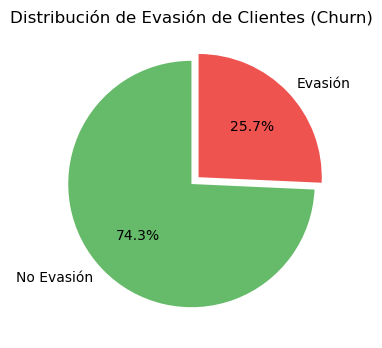

In [26]:

# Visualización de la distribución de la variable "Churn"
plt.figure(figsize=(6,4))
df_aplanado['Churn'].value_counts().plot.pie(
    labels=['No Evasión', 'Evasión'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66bb6a', '#ef5350'],
    explode=(0, 0.08)
)
plt.title('Distribución de Evasión de Clientes (Churn)')
plt.ylabel('')
plt.show()

# Recuento de evasión por variables categóricas


--- Evasión por 'gender' ---
Churn       0      1
gender              
Female  0.739  0.261
Male    0.747  0.253
Churn       0      1
gender              
Female  0.739  0.261
Male    0.747  0.253


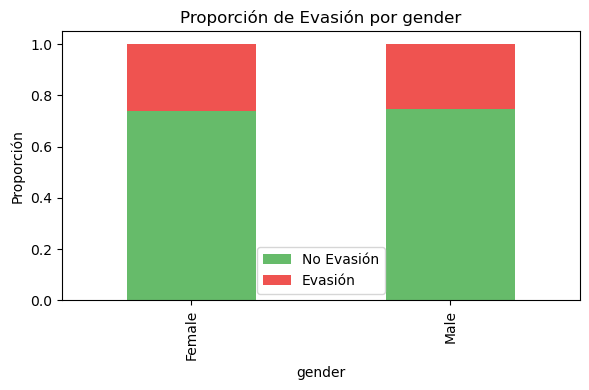


--- Evasión por 'Contract' ---
Churn               0      1
Contract                    
Month-to-month  0.587  0.413
One year        0.891  0.109
Two year        0.972  0.028


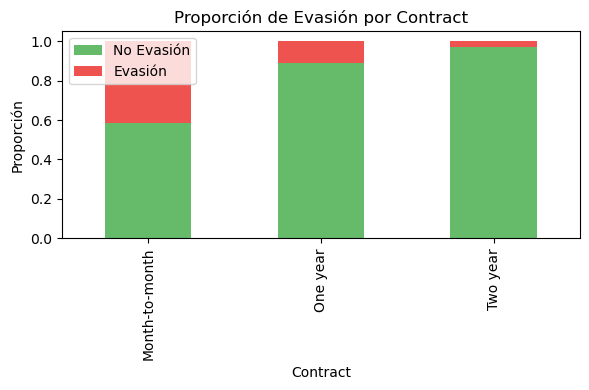


--- Evasión por 'PaymentMethod' ---
Churn                          0      1
PaymentMethod                          
Bank transfer (automatic)  0.838  0.162
Credit card (automatic)    0.852  0.148
Electronic check           0.562  0.438
Mailed check               0.815  0.185


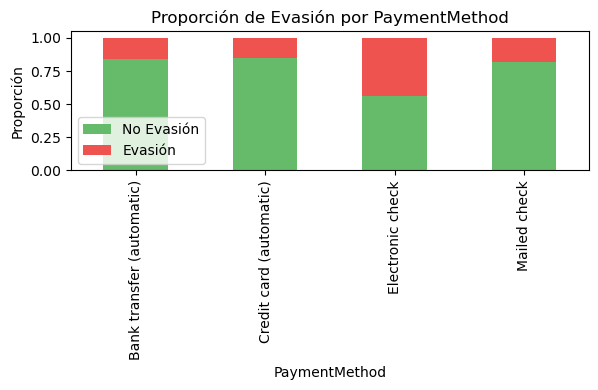


--- Evasión por 'InternetService' ---
Churn                0      1
InternetService              
DSL              0.816  0.184
Fiber optic      0.594  0.406
No               0.929  0.071


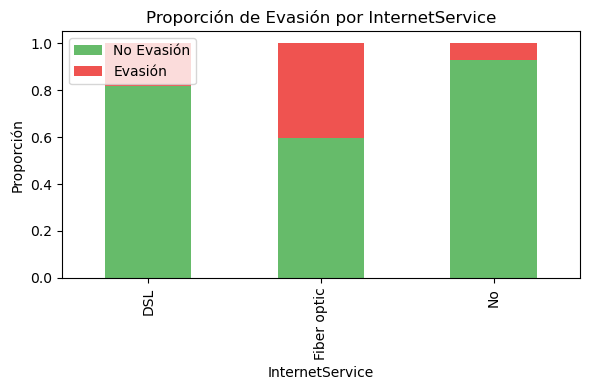


--- Evasión por 'PaperlessBilling' ---
Churn                 0      1
PaperlessBilling              
No                0.841  0.159
Yes               0.675  0.325


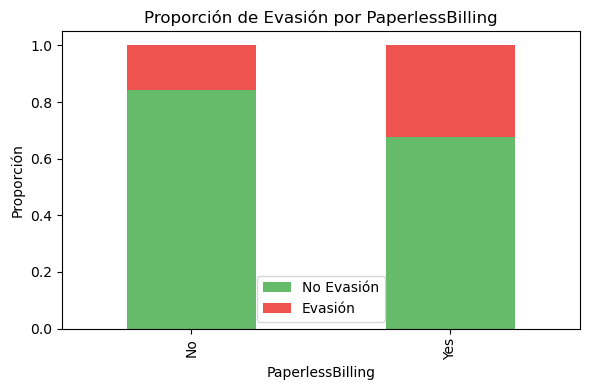


--- Evasión por 'Partner' ---
Churn       0     1
Partner            
No       0.68  0.32
Yes      0.81  0.19


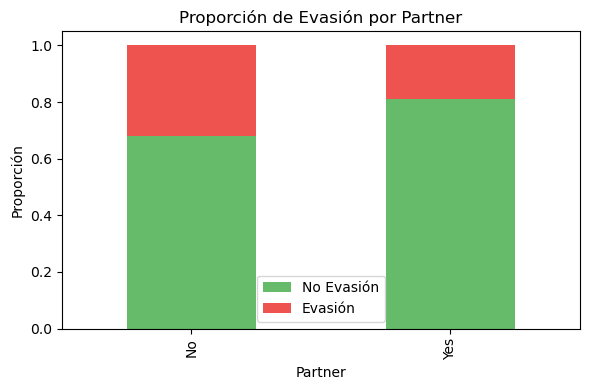


--- Evasión por 'Dependents' ---
Churn           0      1
Dependents              
No          0.697  0.303
Yes         0.851  0.149


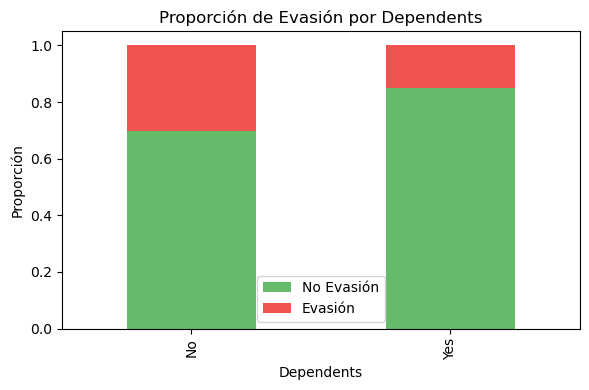

In [27]:
categoricas = ['gender', 'Contract', 'PaymentMethod', 'InternetService', 'PaperlessBilling', 'Partner', 'Dependents']

for col in categoricas:
    if col in df_aplanado.columns:
        print(f"\n--- Evasión por '{col}' ---")
        print(df_aplanado.groupby(col)['Churn'].value_counts(normalize=True).unstack().round(3))
        df_aplanado.groupby(col)['Churn'].value_counts(normalize=True).unstack().plot(
            kind='bar', stacked=True, figsize=(6,4), color=['#66bb6a', '#ef5350']
        )
        plt.title(f'Proporción de Evasión por {col}')
        plt.ylabel('Proporción')
        plt.xlabel(col)
        plt.legend(['No Evasión', 'Evasión'])
        plt.tight_layout()
        plt.show()

# Conteo de evasión por variables numéricas


--- Distribución de 'Charges.Total' por evasión (Churn) ---


e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


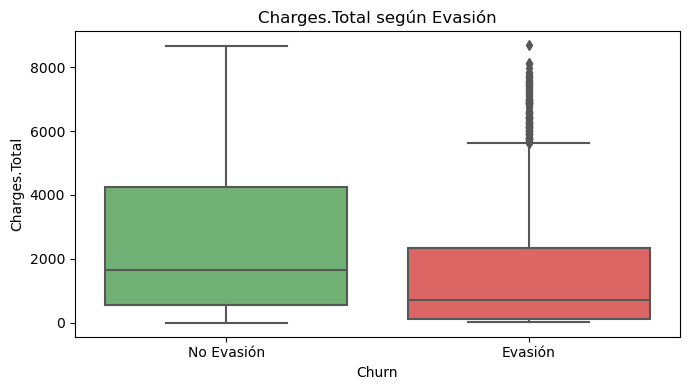


--- Distribución de 'Charges.Monthly' por evasión (Churn) ---


e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


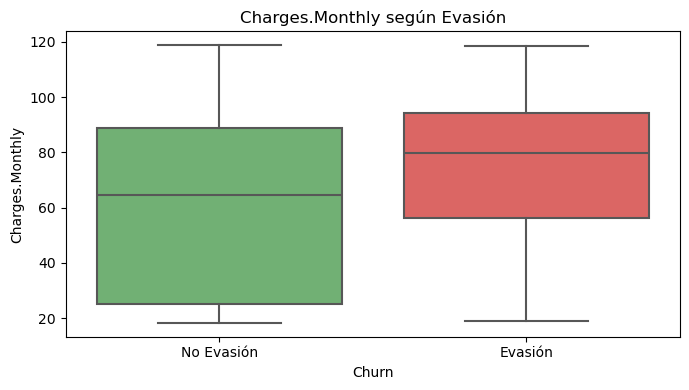


--- Distribución de 'tenure' por evasión (Churn) ---


e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


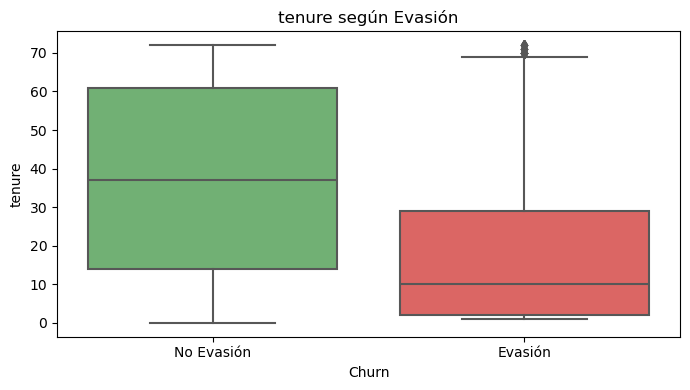

In [30]:

# Variables numéricas a analizar
numericas = ['Charges.Total', 'Charges.Monthly', 'Cuentas_Diarias', 'tenure']

for col in numericas:
    if col in df_aplanado.columns:
        print(f"\n--- Distribución de '{col}' por evasión (Churn) ---")
        plt.figure(figsize=(7,4))
        sns.boxplot(x='Churn', y=col, data=df_aplanado, palette=['#66bb6a', '#ef5350'])
        plt.xticks([0,1], ['No Evasión', 'Evasión'])
        plt.title(f'{col} según Evasión')
        plt.xlabel('Churn')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

# ¡Extra! Análisis de correlación entre variables

=== Matriz de correlación ===
                    Churn  Charges.Total  Charges.Monthly    tenure
Churn            1.000000      -0.193345         0.189866 -0.344079
Charges.Total   -0.193345       1.000000         0.652211  0.825407
Charges.Monthly  0.189866       0.652211         1.000000  0.247982
tenure          -0.344079       0.825407         0.247982  1.000000


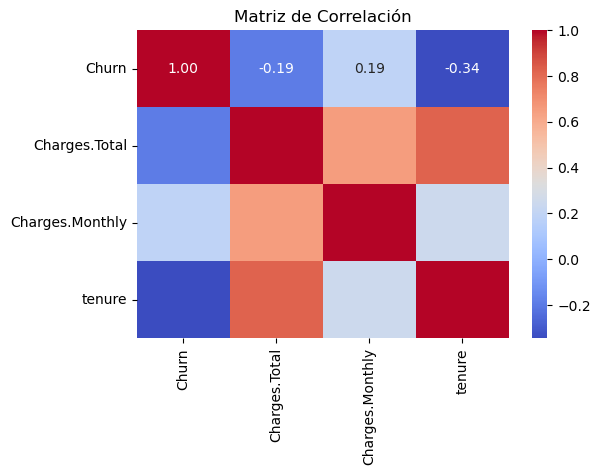

La columna 'Cuentas_Diarias' no está disponible en el DataFrame.


e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


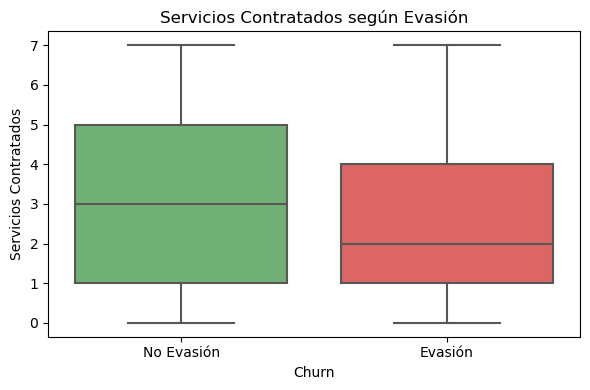

In [33]:
# Análisis de correlación entre variables numéricas
corr_vars = ['Churn', 'Charges.Total', 'Charges.Monthly', 'tenure']
if 'Cuentas_Diarias' in df_aplanado.columns:
    corr_vars.append('Cuentas_Diarias')
corr_df = df_aplanado[corr_vars].corr()
print("=== Matriz de correlación ===")
print(corr_df)

plt.figure(figsize=(6,4))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Relación entre Cuentas_Diarias y evasión
if 'Cuentas_Diarias' in df_aplanado.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='Cuentas_Diarias', y='Churn', data=df_aplanado, alpha=0.3)
    plt.title('Relación entre Cuentas_Diarias y Evasión')
    plt.xlabel('Cuentas_Diarias')
    plt.ylabel('Churn')
    plt.show()
else:
    print("La columna 'Cuentas_Diarias' no está disponible en el DataFrame.")

# Ejemplo: cantidad de servicios contratados vs evasión
servicios = [
    'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
if all(col in df_aplanado.columns for col in servicios):
    df_aplanado['Servicios_Contratados'] = df_aplanado[servicios].apply(lambda x: sum(val == 'Yes' for val in x), axis=1)
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y='Servicios_Contratados', data=df_aplanado, palette=['#66bb6a', '#ef5350'])
    plt.xticks([0,1], ['No Evasión', 'Evasión'])
    plt.title('Servicios Contratados según Evasión')
    plt.xlabel('Churn')
    plt.ylabel('Servicios Contratados')
    plt.tight_layout()
    plt.show()

# 📑Informe final


# Informe Final: Análisis de Evasión de Clientes en TelecomX LATAM

## 🔹 Introducción

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (Churn) en TelecomX LATAM. La evasión de clientes representa una pérdida significativa para las empresas de telecomunicaciones, por lo que identificar patrones y variables asociadas a este fenómeno es clave para diseñar estrategias de retención efectivas.

## 🔹 Limpieza y Tratamiento de Datos

- **Importación:** Se extrajeron los datos desde un archivo JSON y se convirtieron en un DataFrame de pandas.
- **Aplanamiento:** Se desanidaron las columnas complejas para obtener un dataset plano y fácil de analizar.
- **Corrección de inconsistencias:** Se unificaron categorías similares, se corrigieron tipos de datos y se eliminaron o imputaron valores faltantes.
- **Creación de variables:** Se generó la columna `Cuentas_Diarias` para analizar el comportamiento de facturación diaria y `Servicios_Contratados` para cuantificar la cantidad de servicios por cliente.

## 🔹 Análisis Exploratorio de Datos

- **Estadísticas descriptivas:** Se calcularon medidas como media, mediana y desviación estándar para las variables numéricas.
- **Distribución de evasión:** Se visualizó la proporción de clientes que permanecen y los que se dan de baja.
- **Evasión por variables categóricas:** Se analizaron patrones de evasión según género, tipo de contrato, método de pago, etc., identificando segmentos con mayor riesgo.
- **Evasión por variables numéricas:** Se exploró la relación entre el churn y variables como el total gastado, la facturación mensual, el tiempo de contrato y la cantidad de servicios contratados.
- **Correlación:** Se examinó la relación entre variables numéricas y la evasión, identificando factores con mayor impacto.

## 🔹 Conclusiones e Insights

- Los clientes con contratos de tipo "mes a mes" presentan una mayor tasa de evasión comparados con contratos anuales o bianuales.
- Métodos de pago como "Electronic check" están asociados a una mayor probabilidad de churn.
- Un menor tiempo de permanencia (`tenure`) y menor cantidad de servicios contratados se relacionan con mayor evasión.
- La facturación mensual elevada no necesariamente implica mayor churn, pero sí se observa que clientes con menor gasto total tienden a cancelar más.
- La variable `Cuentas_Diarias` ayuda a identificar clientes con bajo compromiso financiero diario, quienes pueden ser más propensos a cancelar.

## 🔹 Recomendaciones

- **Fomentar contratos a largo plazo:** Ofrecer incentivos para que los clientes migren a contratos anuales o bianuales.
- **Mejorar la experiencia de pago:** Promover métodos de pago automáticos y seguros para reducir la evasión asociada a ciertos métodos.
- **Programas de fidelización:** Enfocar esfuerzos en clientes con baja antigüedad y pocos servicios contratados, ofreciéndoles paquetes atractivos o descuentos.
- **Monitoreo proactivo:** Utilizar modelos predictivos para identificar clientes en riesgo y contactarlos antes de que cancelen.
- **Optimizar la oferta de servicios:** Analizar qué combinaciones de servicios retienen mejor a los clientes y promover bundles personalizados.

---

Este análisis proporciona una base sólida para la toma de decisiones estratégicas orientadas a reducir la evasión y aumentar la satisfacción y retención de clientes en TelecomX LATAM.